# **Tugas 1 Eksplorasi dan Visualisasi Data**
## Kelompok: F

### Anggota Kelompok:
1. Justin Martinus (2106724832)
1. Kalisha Rahma Firza (2106725053)
1. Kamal Muftie Yafi (2106725034)
1. Laras Kirana Anindita (2106653035)
1. Raqi Akbar Robbani (2106652562)

# **Preprocessing**

In [ ]:
# Import module untuk program yang akan dijalankan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
from datetime import *

# Import Dataset

In [ ]:
gd = pd.read_csv('/content/ashrae-energy-prediction/building_metadata.csv')
en_test = pd.read_csv('/content/ashrae-energy-prediction/test.csv')
en_train = pd.read_csv('/content/ashrae-energy-prediction/train.csv')
cu_test = pd.read_csv('/content/ashrae-energy-prediction/weather_test.csv')
cu_train = pd.read_csv('/content/ashrae-energy-prediction/weather_train.csv')

## Pengurangan Memori

Akan dilakukan pengurangan penggunaan memori agar proses dapat lebih ringan untuk dilakukan

In [ ]:
# https://www.kaggle.com/kernels/scriptcontent/3684066/download

from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def pengurangan_memori(df, use_float16=False):
    """ iterasi seluruh kolom dari dataframe dan modifikasi tipe data untuk
        mengurangi penggunaan memori
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Penggunaan memori dataframe adalah {:.2f} MB'.format(start_mem))

    # iterasi setiap kolom dan menemukan tipe kolom
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype

        # Jika kolom bukan objek
        if col_type != object:
          # Dapatkan nilai minimum dan maksimum
            c_min = df[col].min()
            c_max = df[col].max()
            # Jika tipenya integer (int)
            if str(col_type)[:3] == 'int':
              # Jika nilai min max terletak pada kisaran tipis tipe int8 maka tetapkan tipe sebagai int8
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
              # Jika nilai min max terletak pada kisaran tipis tipe int16 maka tetapkan tipe sebagai int16
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
              # Jika nilai min max terletak pada kisaran tipis tipe int32 maka tetapkan tipe sebagai int32
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
              # Jika nilai min max terletak pada kisaran tipis tipe int64 maka tetapkan tipe sebagai int64
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
              # Jika nilai min max terletak pada kisaran tipis tipe float16 maka tetapkan tipenya sebagai float16
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
              # Jika nilai min max terletak pada kisaran tipis tipe float32 maka tetapkan tipenya sebagai float32
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Penggunaan memori setelah pengoptimalan adalah: {:.2f} MB'.format(end_mem))
    print('Berkurang sebesar {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
en_train = pengurangan_memori(en_train, use_float16=True)
cu_train = pengurangan_memori(cu_train, use_float16=True)

Penggunaan memori dataframe adalah 616.95 MB
Penggunaan memori setelah pengoptimalan adalah: 173.84 MB
Berkurang sebesar 71.8%
Penggunaan memori dataframe adalah 9.60 MB
Penggunaan memori setelah pengoptimalan adalah: 2.59 MB
Berkurang sebesar 73.1%


In [ ]:
en_test = pengurangan_memori(en_test)
cu_test = pengurangan_memori(cu_test)

Penggunaan memori dataframe adalah 1272.51 MB
Penggunaan memori setelah pengoptimalan adalah: 358.53 MB
Berkurang sebesar 71.8%
Penggunaan memori dataframe adalah 19.04 MB
Penggunaan memori setelah pengoptimalan adalah: 5.13 MB
Berkurang sebesar 73.0%


## Melihat Data

In [ ]:
# Cek bentuk
print('Bentuk dari building meta data:', gd.shape)
print('Bentuk dari test data:', en_test.shape)
print('Bentuk dari train data:', en_train.shape)
print('Bentuk dari weather train data:', cu_train.shape)
print('Bentuk dari weather test data:', cu_test.shape)

Bentuk dari building meta data: (1449, 6)
Bentuk dari test data: (41697600, 4)
Bentuk dari train data: (20216100, 4)
Bentuk dari weather train data: (139773, 9)
Bentuk dari weather test data: (277243, 9)


Hal pertama yang harus dilakukan ketika mendapatkan dataset baru adalah melihat beberapa isinya. Ini memungkinkan untuk melihat bahwa semuanya terbaca dengan benar dan memberikan gambaran tentang apa yang terjadi dengan data. Dalam hal ini, dapat dilihat apakah ada nilai yang hilang, yang akan direpresentasikan dengan `NaN` atau `None`.

In [ ]:
gd.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
en_test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


Substitusi nilai pada `meter` dengan info pada *Data Description* di Kaggle

In [ ]:
en_train['meter'].replace({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}, inplace=True)
en_train.head()

,building_id,meter,timestamp,meter_reading
0,0,electricity,2016-01-01 00:00:00,0.0
1,1,electricity,2016-01-01 00:00:00,0.0
2,2,electricity,2016-01-01 00:00:00,0.0
3,3,electricity,2016-01-01 00:00:00,0.0
4,4,electricity,2016-01-01 00:00:00,0.0


In [ ]:
cu_test.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,0,2017-01-01 01:00:00,17.796875,2.0,12.796875,0.0,1022.0,130.0,3.099609
2,0,2017-01-01 02:00:00,16.093750,0.0,12.796875,0.0,1022.0,140.0,3.099609
3,0,2017-01-01 03:00:00,17.203125,0.0,13.296875,0.0,1022.0,140.0,3.099609
4,0,2017-01-01 04:00:00,16.703125,2.0,13.296875,0.0,1022.5,130.0,2.599609


In [ ]:
cu_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609


## Penggabungan Data

Karena `en_train` memiliki `building_id`, maka akan di-*merge* dengan `gd`.

In [ ]:
train = en_train.merge(gd, on='building_id', how='left')

In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,electricity,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,1,electricity,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN
2,2,electricity,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN
3,3,electricity,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN
4,4,electricity,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN


Tabel `train` yang sudah di-*merge* akan di-*merge* kembali dengan tabel `cu_train` dengan bantuan kolom `site_id` dan `timestamp`

In [ ]:
train = train.merge(cu_train, on=['site_id', 'timestamp'], how='left')

In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,electricity,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,electricity,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,electricity,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,electricity,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,electricity,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [ ]:
del cu_train

Karena `en_test` memiliki `building_id`, maka akan di-*merge* dengan `gd`.

In [ ]:
test = en_test.merge(gd, on='building_id', how='left')

In [ ]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN


Tabel `test` yang sudah di-*merge* akan di-*merge* kembali dengan tabel `cu_test` dengan bantuan kolom `site_id` dan `timestamp`

In [ ]:
test = test.merge(cu_test, on=['site_id', 'timestamp'], how='left')

In [ ]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609


In [ ]:
del cu_test, gd

In [ ]:
pengurangan_memori(train)

Penggunaan memori dataframe adalah 1504.13 MB
Penggunaan memori setelah pengoptimalan adalah: 790.78 MB
Berkurang sebesar 47.4%


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,electricity,2016-01-01 00:00:00,0.000000,0,Education,7432,2008.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
1,1,electricity,2016-01-01 00:00:00,0.000000,0,Education,2720,2004.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
2,2,electricity,2016-01-01 00:00:00,0.000000,0,Education,5376,1991.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
3,3,electricity,2016-01-01 00:00:00,0.000000,0,Education,23685,2002.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
4,4,electricity,2016-01-01 00:00:00,0.000000,0,Education,116607,1975.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,electricity,2016-12-31 23:00:00,8.750000,15,Entertainment/public assembly,19619,1914.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216096,1445,electricity,2016-12-31 23:00:00,4.825000,15,Education,4298,NaN,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216097,1446,electricity,2016-12-31 23:00:00,0.000000,15,Entertainment/public assembly,11265,1997.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216098,1447,electricity,2016-12-31 23:00:00,159.574997,15,Lodging/residential,29775,2001.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875


In [ ]:
pengurangan_memori(test)

Penggunaan memori dataframe adalah 2824.02 MB
Penggunaan memori setelah pengoptimalan adalah: 1631.04 MB
Berkurang sebesar 42.2%


,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00,15,Entertainment/public assembly,19619,1914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41697596,41697596,1445,0,2018-05-09 07:00:00,15,Education,4298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41697597,41697597,1446,0,2018-05-09 07:00:00,15,Entertainment/public assembly,11265,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41697598,41697598,1447,0,2018-05-09 07:00:00,15,Lodging/residential,29775,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Setelah melakukan penggabungan data, cek banyaknya *missing values* dalam data.

In [ ]:
train.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [ ]:
test.isnull().sum()

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count           34444320
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
dtype: int64

## Mengurai Waktu (Parse timestamp)

In [ ]:
train['timestamp']= pd.to_datetime(train['timestamp'])
train['hour']= train['timestamp'].dt.hour.astype(np.int8)
train['dayofweek']= train['timestamp'].dt.dayofweek.astype(np.int8)
train['month']= train['timestamp'].dt.month.astype(np.int8)
train['dayofyear']= train['timestamp'].dt.dayofyear.astype(np.int16)
train['day']= train['timestamp'].dt.day.astype(np.int16)
train['year']= train['timestamp'].dt.year.astype(np.int16)

In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
0,0,electricity,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,4,1,1,1,2016
1,1,electricity,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,4,1,1,1,2016
2,2,electricity,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,4,1,1,1,2016
3,3,electricity,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,4,1,1,1,2016
4,4,electricity,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,0,4,1,1,1,2016


## Outlier Detection

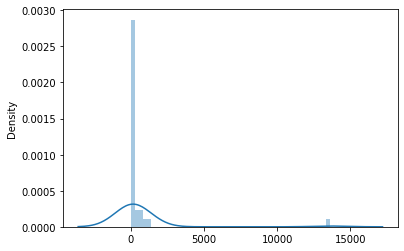

In [ ]:
#detect outlier
train_gb_site = train.groupby('site_id').meter_reading.mean().reset_index()
sns.distplot(train_gb_site)

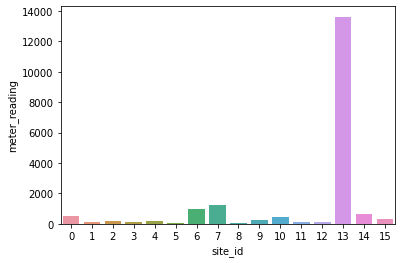

In [ ]:
sns.barplot(x='site_id', y='meter_reading', data = train_gb_site)

Terlihat pada `site_id` `13` nilai `meter_reading`-nya terlalu jauh dari `site` yang lain. Maka, akan dilihat lebih dalam pada site 13

In [ ]:
site_13 = train.loc[train['site_id'] == 13]
site_13.describe()

,building_id,meter_reading,site_id,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
count,2.708368e+06,2.708368e+06,2708368.0,2.708368e+06,2.708368e+06,2708368.0,2.708368e+06,2708368.0,2708368.0,2708368.0,2.708368e+06,2.708368e+06,2.708368e+06,2.708368e+06,2.708368e+06,2.708368e+06,2708368.0
mean,1.145669e+03,1.261532e+03,13.0,1.476250e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.149916e+01,3.008348e+00,6.518029e+00,1.836355e+02,1.575905e+01,2016.0
std,4.455483e+01,5.989895e+03,0.0,1.400906e+05,0.000000e+00,0.0,0.000000e+00,0.0,NaN,NaN,0.000000e+00,6.922898e+00,1.997940e+00,3.451483e+00,1.056628e+02,8.811408e+00,0.0
min,1.069000e+03,0.000000e+00,13.0,1.038500e+04,-2.890625e+01,0.0,-3.170312e+01,-1.0,981.5,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2016.0
25%,1.105000e+03,2.365700e+01,13.0,7.004000e+04,6.000977e-01,2.0,-3.900391e+00,0.0,1011.0,120.0,2.599609e+00,5.000000e+00,1.000000e+00,4.000000e+00,9.200000e+01,8.000000e+00,2016.0
50%,1.148000e+03,1.190120e+02,13.0,1.008130e+05,1.110156e+01,4.0,3.900391e+00,0.0,1016.0,180.0,4.101562e+00,1.100000e+01,3.000000e+00,7.000000e+00,1.840000e+02,1.600000e+01,2016.0
75%,1.184000e+03,5.507800e+02,13.0,1.921520e+05,2.000000e+01,7.0,1.329688e+01,0.0,1021.0,280.0,5.699219e+00,1.800000e+01,5.000000e+00,1.000000e+01,2.750000e+02,2.300000e+01,2016.0
max,1.222000e+03,3.566400e+05,13.0,8.615240e+05,3.559375e+01,9.0,2.500000e+01,216.0,1040.0,360.0,1.600000e+01,2.300000e+01,6.000000e+00,1.200000e+01,3.660000e+02,3.100000e+01,2016.0


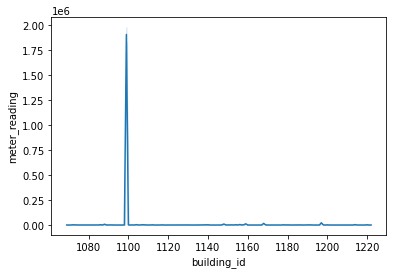

In [ ]:
sns.lineplot(x='building_id', y='meter_reading', data = site_13)

Terlihat bahwa ada data yang menjulang tinggi di sekitar `1100` dibandingkan data yang lain. Maka, akan dilihat secara descending pada variabel `meter_reading`

In [ ]:
train.sort_values('meter_reading', ascending = False)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
8907488,1099,steam,2016-06-13 09:00:00,21904700.0,13,Education,332884,NaN,NaN,19.406250,...,0.0,1014.5,50.0,6.199219,9,0,6,165,13,2016
8738539,1099,steam,2016-06-10 09:00:00,21889900.0,13,Education,332884,NaN,NaN,21.093750,...,0.0,1007.5,130.0,5.101562,9,4,6,162,10,2016
8736187,1099,steam,2016-06-10 08:00:00,21874500.0,13,Education,332884,NaN,NaN,21.093750,...,0.0,1007.0,140.0,6.199219,8,4,6,162,10,2016
17286421,1099,steam,2016-11-09 14:00:00,21847900.0,13,Education,332884,NaN,NaN,3.900391,...,0.0,1029.0,190.0,2.099609,14,2,11,314,9,2016
8905140,1099,steam,2016-06-13 08:00:00,21844500.0,13,Education,332884,NaN,NaN,20.000000,...,8.0,1013.0,140.0,3.599609,8,0,6,165,13,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298533,789,steam,2016-06-20 08:00:00,0.0,7,Education,64583,1923.0,1.0,19.203125,...,NaN,1017.0,200.0,2.599609,8,0,6,172,20,2016
9298538,791,steam,2016-06-20 08:00:00,0.0,7,Education,150695,NaN,5.0,19.203125,...,NaN,1017.0,200.0,2.599609,8,0,6,172,20,2016
9298543,793,hotwater,2016-06-20 08:00:00,0.0,7,Education,150695,1964.0,6.0,19.203125,...,NaN,1017.0,200.0,2.599609,8,0,6,172,20,2016
9298552,796,steam,2016-06-20 08:00:00,0.0,7,Education,226042,1965.0,2.0,19.203125,...,NaN,1017.0,200.0,2.599609,8,0,6,172,20,2016


Pada `building_id` `1099`, terlihat bahwa nilai `meter_reading`-nya terlalu tinggi, yakni pada nilai sekitar `21000000`

In [ ]:
train_buildingid1099 = train.loc[train['building_id'] == 1099]
train_buildingid1099.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
1533,1099,electricity,2016-01-01 00:00:00,2.822480e+02,13,Education,332884,NaN,NaN,-8.296875,...,NaN,1023.5,250.0,4.101562,0,4,1,1,1,2016
1534,1099,steam,2016-01-01 00:00:00,3.241630e+06,13,Education,332884,NaN,NaN,-8.296875,...,NaN,1023.5,250.0,4.101562,0,4,1,1,1,2016
3829,1099,electricity,2016-01-01 01:00:00,2.822480e+02,13,Education,332884,NaN,NaN,-8.296875,...,-1.0,1023.5,240.0,4.101562,1,4,1,1,1,2016
3830,1099,steam,2016-01-01 01:00:00,3.241630e+06,13,Education,332884,NaN,NaN,-8.296875,...,-1.0,1023.5,240.0,4.101562,1,4,1,1,1,2016
6125,1099,electricity,2016-01-01 02:00:00,2.848640e+02,13,Education,332884,NaN,NaN,-7.800781,...,-1.0,1023.0,240.0,3.099609,2,4,1,1,1,2016


In [ ]:
def outl_up(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    outl_up_data = df.loc[(df[col] > upper_b)]
    return outl_up_data

def outl_up_nilai(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    outl_up_data = df.loc[(df[col] > upper_b)]
    return upper_b

In [ ]:
outl_up_meter_read = outl_up(train_buildingid1099, 'meter_reading')
outl_up_meter_read_b = outl_up_nilai(train_buildingid1099, 'meter_reading')

outl_up_meter_read.describe()

,building_id,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
count,3395.0,3395.0,3395.0,3395.0,0.0,0.0,3394.000000,1560.000000,3394.000000,3391.000000,3350.000000,3316.0000,3394.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.0
mean,1099.0,9861900.0,13.0,332884.0,NaN,NaN,8.453125,3.173828,1.128906,0.646484,inf,inf,4.441406,11.634757,3.012371,3.764654,98.971134,15.175258,2016.0
std,0.0,6518963.0,0.0,0.0,NaN,NaN,9.828125,2.794922,8.429688,5.320312,7.320312,108.4375,2.326172,6.945174,1.957073,1.835851,54.966913,8.945634,0.0
min,1099.0,16800.0,13.0,332884.0,NaN,NaN,-25.593750,0.000000,-29.406250,-1.000000,988.500000,0.0000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2016.0
25%,1099.0,4806610.0,13.0,332884.0,NaN,NaN,0.600098,0.000000,-4.398438,0.000000,1009.500000,100.0000,2.599609,6.000000,1.000000,3.000000,64.000000,7.000000,2016.0
50%,1099.0,7570700.0,13.0,332884.0,NaN,NaN,7.800781,2.000000,0.600098,0.000000,1015.000000,170.0000,4.101562,12.000000,3.000000,4.000000,100.000000,15.000000,2016.0
75%,1099.0,16053500.0,13.0,332884.0,NaN,NaN,16.703125,4.000000,7.199219,0.000000,1020.000000,280.0000,6.199219,18.000000,5.000000,5.000000,136.000000,23.000000,2016.0
max,1099.0,21904700.0,13.0,332884.0,NaN,NaN,33.312500,9.000000,21.093750,165.000000,1035.000000,360.0000,14.898438,23.000000,6.000000,11.000000,317.000000,31.000000,2016.0


Terlihat bahwa benar outlier terdapat pada variabel `building_id == 1099`. Maka, akan di drop `building_id == 1099`

In [ ]:
len_raw = len(train)
train = train.drop(train[(train.meter_reading > outl_up_meter_read_b) & (train.building_id == 1099)].index)
len_clean = len(train)
count_out = len_raw - len_clean
print('Jumlah outlier pada column meter_reading:',count_out)

Jumlah outlier pada column meter_reading: 3395


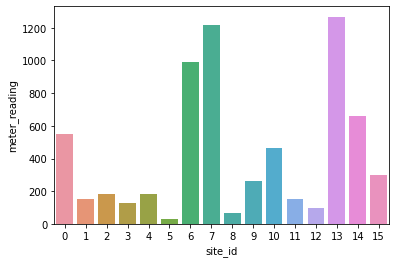

In [ ]:
train_gb_site = train.groupby('site_id').meter_reading.mean().reset_index()
sns.barplot(x='site_id', y='meter_reading', data = train_gb_site)

Kini data sudah terdistribusi dengan cukup baik tanpa adanya outlier.

## Handling Missing Values (NAs)

In [ ]:
def persentase_na(df):

    persentase_na = (df.isnull().sum() / len(df)) * 100
    na_df = pd.DataFrame({'column_name': df.columns,
                                   'percent_missing': persentase_na})
    return na_df

In [ ]:
train_na = persentase_na(train)

In [ ]:
train_na

,column_name,percent_missing
building_id,building_id,0.000000
meter,meter,0.000000
timestamp,timestamp,0.000000
meter_reading,meter_reading,0.000000
site_id,site_id,0.000000
primary_use,primary_use,0.000000
square_feet,square_feet,0.000000
year_built,year_built,59.983312
floor_count,floor_count,82.649858
air_temperature,air_temperature,0.478199


Karena persentase missing values pada kolom `year_built` dan `floor_count` sangatlah besar. Maka, kolom tersebut akan di *drop*. Setelah diperhatikan, kolom-kolom tersebut juga bukanlah *key feature*, maka tidak akan diperhitungkan juga.

In [ ]:
train.drop(['year_built', 'floor_count'], axis=1, inplace=True)

### Pengisian Missing Values

In [ ]:
air_temp_df = train.groupby(['site_id', 'day', 'month'])['air_temperature'].transform('mean')
train['air_temperature'].fillna(air_temp_df, inplace=True)

dew_temp_df = train.groupby(['site_id', 'day', 'month'])['dew_temperature'].transform('mean')
train['dew_temperature'].fillna(dew_temp_df, inplace=True)

cloud_df = train.groupby(['site_id', 'day', 'month'])['cloud_coverage'].transform('mean')
train['cloud_coverage'].fillna(cloud_df, inplace=True)

sea_level_df = train.groupby(['site_id', 'day', 'month'])['sea_level_pressure'].transform('mean')
train['sea_level_pressure'].fillna(sea_level_df, inplace=True)

precip_df = train.groupby(['site_id', 'day', 'month'])['precip_depth_1_hr'].transform('mean')
train['precip_depth_1_hr'].fillna(precip_df, inplace=True)

wind_dir_df = train.groupby(['site_id', 'day', 'month'])['wind_direction'].transform('mean')
train['wind_direction'].fillna(wind_dir_df, inplace=True)

wind_speed_df = train.groupby(['site_id', 'day', 'month'])['wind_speed'].transform('mean')
train['wind_speed'].fillna(wind_speed_df, inplace=True)

In [ ]:
train.isnull().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature             0
cloud_coverage        1397901
dew_temperature             0
precip_depth_1_hr     2825816
sea_level_pressure     833317
wind_direction              0
wind_speed                  0
hour                        0
dayofweek                   0
month                       0
dayofyear                   0
day                         0
year                        0
dtype: int64

In [ ]:
train['cloud_coverage'].fillna(train['cloud_coverage'].median(), inplace=True)
train['sea_level_pressure'].fillna(train['sea_level_pressure'].median(), inplace=True)
train['precip_depth_1_hr'].fillna(train['precip_depth_1_hr'].median(), inplace=True)

## Data yang sudah dilakukan *preprocessing*

In [ ]:
train

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
0,0,electricity,2016-01-01 00:00:00,0.000000,0,Education,7432,25.000000,6.0,20.000000,-0.17395,1019.5,0.0,0.000000,0,4,1,1,1,2016
1,1,electricity,2016-01-01 00:00:00,0.000000,0,Education,2720,25.000000,6.0,20.000000,-0.17395,1019.5,0.0,0.000000,0,4,1,1,1,2016
2,2,electricity,2016-01-01 00:00:00,0.000000,0,Education,5376,25.000000,6.0,20.000000,-0.17395,1019.5,0.0,0.000000,0,4,1,1,1,2016
3,3,electricity,2016-01-01 00:00:00,0.000000,0,Education,23685,25.000000,6.0,20.000000,-0.17395,1019.5,0.0,0.000000,0,4,1,1,1,2016
4,4,electricity,2016-01-01 00:00:00,0.000000,0,Education,116607,25.000000,6.0,20.000000,-0.17395,1019.5,0.0,0.000000,0,4,1,1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,electricity,2016-12-31 23:00:00,8.750000,15,Entertainment/public assembly,19619,1.700195,2.0,-5.601562,-1.00000,1008.5,180.0,8.796875,23,5,12,366,31,2016
20216096,1445,electricity,2016-12-31 23:00:00,4.825000,15,Education,4298,1.700195,2.0,-5.601562,-1.00000,1008.5,180.0,8.796875,23,5,12,366,31,2016
20216097,1446,electricity,2016-12-31 23:00:00,0.000000,15,Entertainment/public assembly,11265,1.700195,2.0,-5.601562,-1.00000,1008.5,180.0,8.796875,23,5,12,366,31,2016
20216098,1447,electricity,2016-12-31 23:00:00,159.574997,15,Lodging/residential,29775,1.700195,2.0,-5.601562,-1.00000,1008.5,180.0,8.796875,23,5,12,366,31,2016


Data hasil *preprocessing* di atas akan di-*export* menjadi file `.csv`

In [ ]:
train.to_csv('tugas1_eda_kelompok_f.csv', index = False)

# **Insights**

## Statistika Deskriptif

In [ ]:
train.describe()

,building_id,meter_reading,site_id,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
count,2.021270e+07,2.021270e+07,2.021270e+07,2.021270e+07,2.021270e+07,20212705.0,2.021270e+07,20212705.0,20212705.0,20212705.0,2.021270e+07,2.021270e+07,2.021270e+07,2.021270e+07,2.021270e+07,2.021270e+07,20212705.0
mean,7.992277e+02,4.381306e+02,7.991391e+00,1.077452e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150230e+01,3.006957e+00,6.578926e+00,1.854934e+02,1.576133e+01,2016.0
std,4.269315e+02,4.210564e+03,5.099075e+00,1.171159e+05,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00,6.922013e+00,1.997198e+00,3.436675e+00,1.052636e+02,8.820510e+00,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,-2.890625e+01,0.0,-3.500000e+01,-1.0,968.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2016.0
25%,3.930000e+02,1.830000e+01,3.000000e+00,3.252700e+04,8.296875e+00,0.0,0.000000e+00,0.0,1012.0,80.0,2.099609e+00,6.000000e+00,1.000000e+00,4.000000e+00,9.600000e+01,8.000000e+00,2016.0
50%,8.950000e+02,7.874230e+01,9.000000e+00,7.270900e+04,1.670312e+01,2.0,8.898438e+00,0.0,1016.0,170.0,3.099609e+00,1.200000e+01,3.000000e+00,7.000000e+00,1.860000e+02,1.600000e+01,2016.0
75%,1.179000e+03,2.677380e+02,1.300000e+01,1.391130e+05,2.390625e+01,4.0,1.609375e+01,0.0,1020.5,270.0,4.601562e+00,1.800000e+01,5.000000e+00,1.000000e+01,2.760000e+02,2.300000e+01,2016.0
max,1.448000e+03,8.803740e+05,1.500000e+01,8.750000e+05,4.718750e+01,9.0,2.609375e+01,343.0,1046.0,360.0,1.900000e+01,2.300000e+01,6.000000e+00,1.200000e+01,3.660000e+02,3.100000e+01,2016.0


In [ ]:
train['meter_reading'].max()

880374.0

In [ ]:
train['meter_reading'].min()

0.0

In [ ]:
train[train['meter_reading'] == 880374].head(10)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
13851463,778,chilledwater,2016-09-09 17:00:00,880374.0,6,Entertainment/public assembly,108339,33.90625,0.0,20.0,0.0,1014.5,132.375,1.470703,17,4,9,253,9,2016


In [ ]:
train[train['meter_reading'] == 0].head(10)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,dayofweek,month,dayofyear,day,year
0,0,electricity,2016-01-01,0.0,0,Education,7432,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
1,1,electricity,2016-01-01,0.0,0,Education,2720,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
2,2,electricity,2016-01-01,0.0,0,Education,5376,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
3,3,electricity,2016-01-01,0.0,0,Education,23685,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
4,4,electricity,2016-01-01,0.0,0,Education,116607,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
5,5,electricity,2016-01-01,0.0,0,Education,8000,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
6,6,electricity,2016-01-01,0.0,0,Lodging/residential,27926,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
7,7,electricity,2016-01-01,0.0,0,Education,121074,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
8,8,electricity,2016-01-01,0.0,0,Education,60809,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016
9,9,electricity,2016-01-01,0.0,0,Office,27000,25.0,6.0,20.0,-0.17395,1019.5,0.0,0.0,0,4,1,1,1,2016


Berdasarkan tabel akan digunakan baris yang pertama untuk nilai minimum meter_reading

In [ ]:
train['primary_use'].mode()

0    Education
Name: primary_use, dtype: category
Categories (16, object): ['Education', 'Entertainment/public assembly',
                          'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science',
                          'Utility', 'Warehouse/storage']

Dari hasil program diperoleh sektor `Entertainment` adalah sektor yang paling banyak menghabiskan energi. Namun, sektor yang paling banyak digunakan di Peruntukan Gedung tersebut adalah adalah `Education`. Hal ini menunjukkan sektor yang paling banyak digunakan perusahaan tidak menjamin penggunaan energi paling besar.

In [ ]:
train['square_feet'].max()

875000

Dari hasil program diperoleh luas bangunan gedung yang menghabiskan energi terbanyak adalah 108339. Namun, luas bangunan terbesar adalah 875000. Hal ini menunjukkan bahwa luas bangunan gedung terbesar tidak menjamin penggunaan energi paling besar.


In [ ]:
train['meter'].mode()

0    electricity
Name: meter, dtype: category
Categories (4, object): ['chilledwater', 'electricity', 'hotwater', 'steam']

Dari hasil program diperoleh jenis `meter_reading` yang digunakan untuk energi terbanyak adalah `chilledwater`. Namun, jenis `meter_reading` yang paling banyak digunakan adalah `electricity`. Hal ini menunjukkan bahwa jenis meter reading yang paling banyak digunakan tidak menjamin penggunaan energi terbanyak.

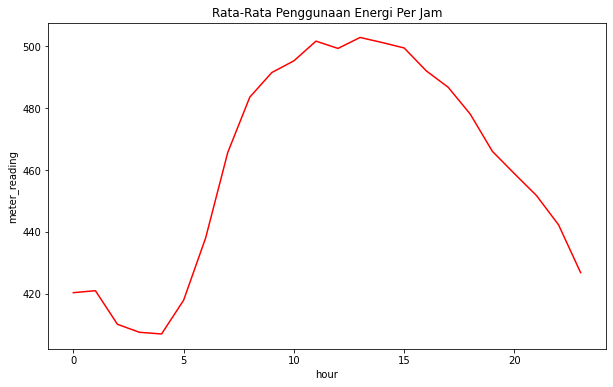

In [ ]:
#Visualisasi Rata-Rata Penggunaan Energi tiap Jam
per_hour = train.groupby(['hour']).meter_reading.mean().reset_index()
fig, (ax1) = plt.subplots(1, figsize = (10,6))
sns.lineplot(x = per_hour['hour'], y = per_hour['meter_reading'], color='red', ax = ax1)
ax1.set_title('Rata-Rata Penggunaan Energi Per Jam')

plt.show()

Dapat dilihat bahwa penggunaan energi pada interval antara pukul 10 hingga 15 meningkat. Ini menunjukkan aktivitas yang menggunakan banyak energi meningkat di siang hari.

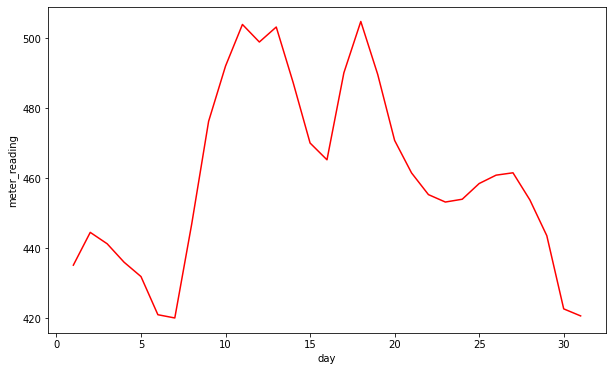

In [ ]:
#Visualisasi Rata-Rata Penggunaan Energi tiap Hari
per_day = train.groupby(['day']).meter_reading.mean().reset_index()
fig, (ax2) = plt.subplots(1, figsize = (10,6))
sns.lineplot(x = per_day['day'], y = per_day['meter_reading'], color='red', ax = ax2)
ax1.set_title('Rata-Rata Penggunaan Energi Per Hari')

plt.show()

Dapat dilihat bahwa aktivitas yang menggunakan banyak energi meningkat di pertengahan bulan.

Text(0.5, 1.0, 'Rata-Rata Penggunaan Energi Per Bulan')

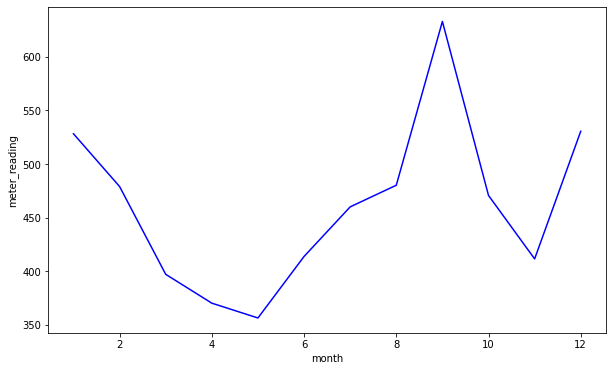

In [ ]:
#Visualisasi Rata-Rata Penggunaan Energi tiap Bulan
per_month = train.groupby(['month']).meter_reading.mean().reset_index()
fig, (ax1) = plt.subplots(1, figsize = (10,6))
sns.lineplot(x = per_month['month'], y = per_month['meter_reading'], color='blue')
ax2.set_title('Rata-Rata Penggunaan Energi Per Bulan')

Dapat dilihat bahwa penggunaan energi pada interval bulan ke 5 sampai bulan ke 7 meningkat. Ini menunjukkan aktivitas yang menggunakan banyak energi meningkat di pertengahan tahun.

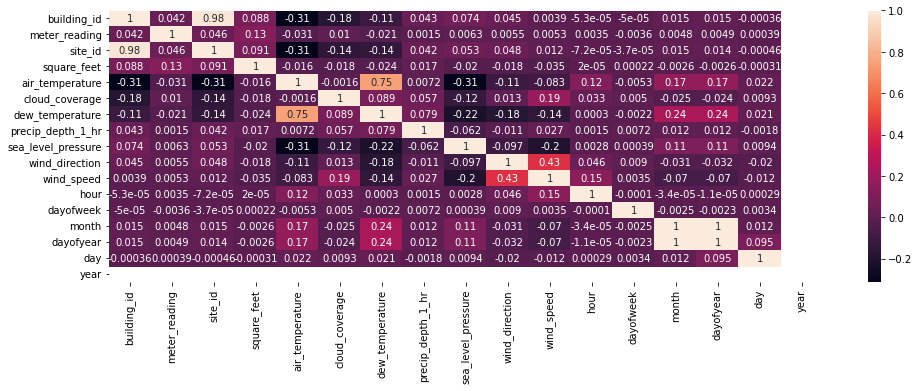

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(train.corr(), annot=True)

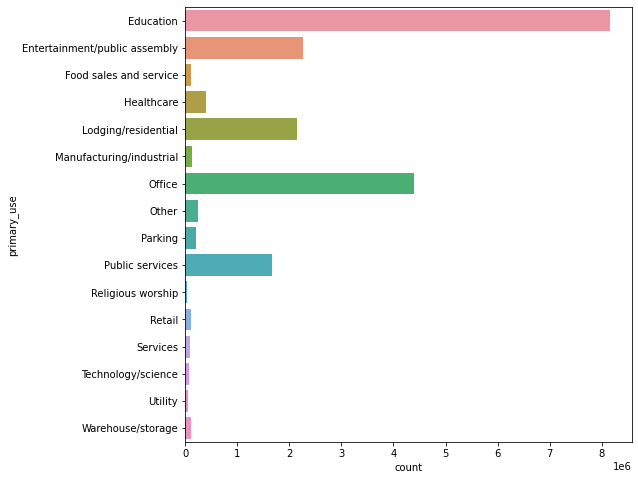

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='primary_use', data=train)

`Education` memiliki jumlah count terbanyak. Sehingga artinya banyak aktivitas dari sektor `Education`.

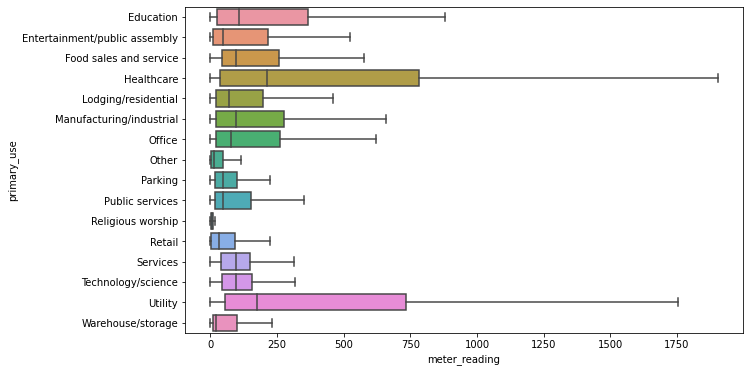

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(x = 'meter_reading', y = 'primary_use', data = train, showfliers = False)

Berdasarkan hasil visualisasi, diperoleh secara *general* energi terbanyak digunakan oleh `Healthcare`. Kesimpulannya, jumlah tempat penggunaan energi di suatu sektor tidak menyebabkan sektor tersebut memiliki penggunaan energi terbesar.

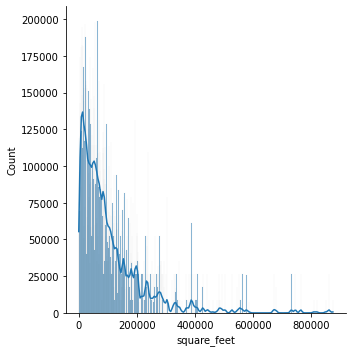

In [ ]:
col = 'square_feet'
plot = sns.displot(data=train, x=col, kde=True)

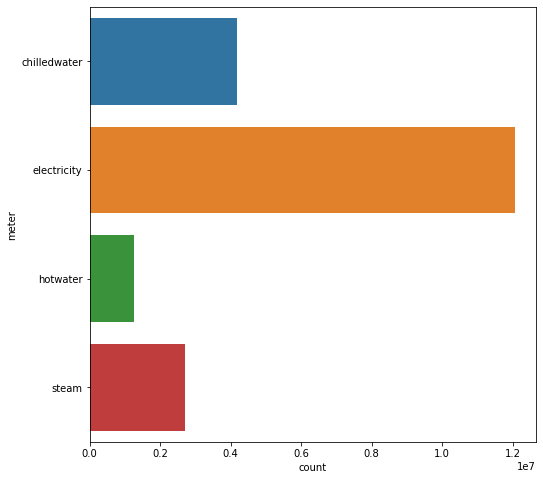

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='meter', data=train)

Walau begitu, jenis energi yang paling banyak digunakan secara keseluruhan adalah `electricity`.

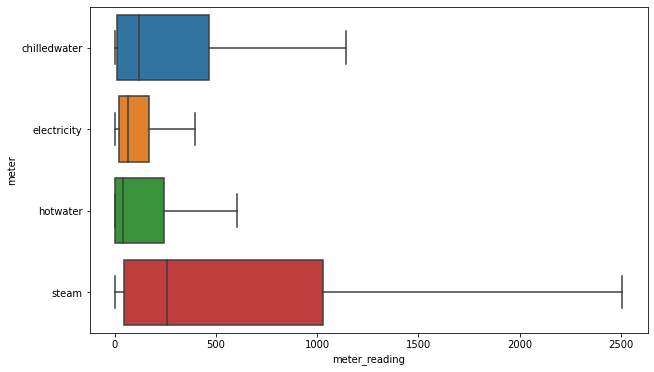

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(x = 'meter_reading', y = 'meter', data = train, showfliers = False)

Penggunaan energi yang paling banyak mengonsumsi energi adalah pengukuran jenis `steam`.

# **Terima Kasih**